# DSCI 100 Project Report - Classifying Rocks and Mines

## Introduction

### Background

The goal of our project is to understand the difference between man-made pollutants and compare and contrast it with sonar data that would be obtained from rocks. More specifically, we will classify mines vs rocks based on sonar data energy levels. 

The objects located on the seafloor or buried under the sand are difficult to detect because of their appearance, environment, and shape. Hence, these challenges can be addressed with an accurate classification model and more can be understood about the objects within our oceans - simply by relying on sonar data. Thereby, reducing the number of false identifications when exploring the seabeds. 

### Guiding Question

Given 60 different energy levels from different frequency bands obtained from a sonar system, can one determine whether an underwater object is a rock or a mine using a K-NN classification model? 

### Dataset

We will train the model using the Connectionist Bench (Sonar, Mines vs. Rocks) Data Set from the University of California Irvine. Below we have 208 instances (111 patterns sonar information from mines and 97 patterns from rocks) that were obtained by bouncing sonar signals off objects underwater in certain conditions and at various angles. Each observation is between 0.0 to 1.0 and represents the energy level within a particular frequency band, over a given period of X1 to X60. This will allow us to write a classification algorithm differentiating between the two objects. 

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

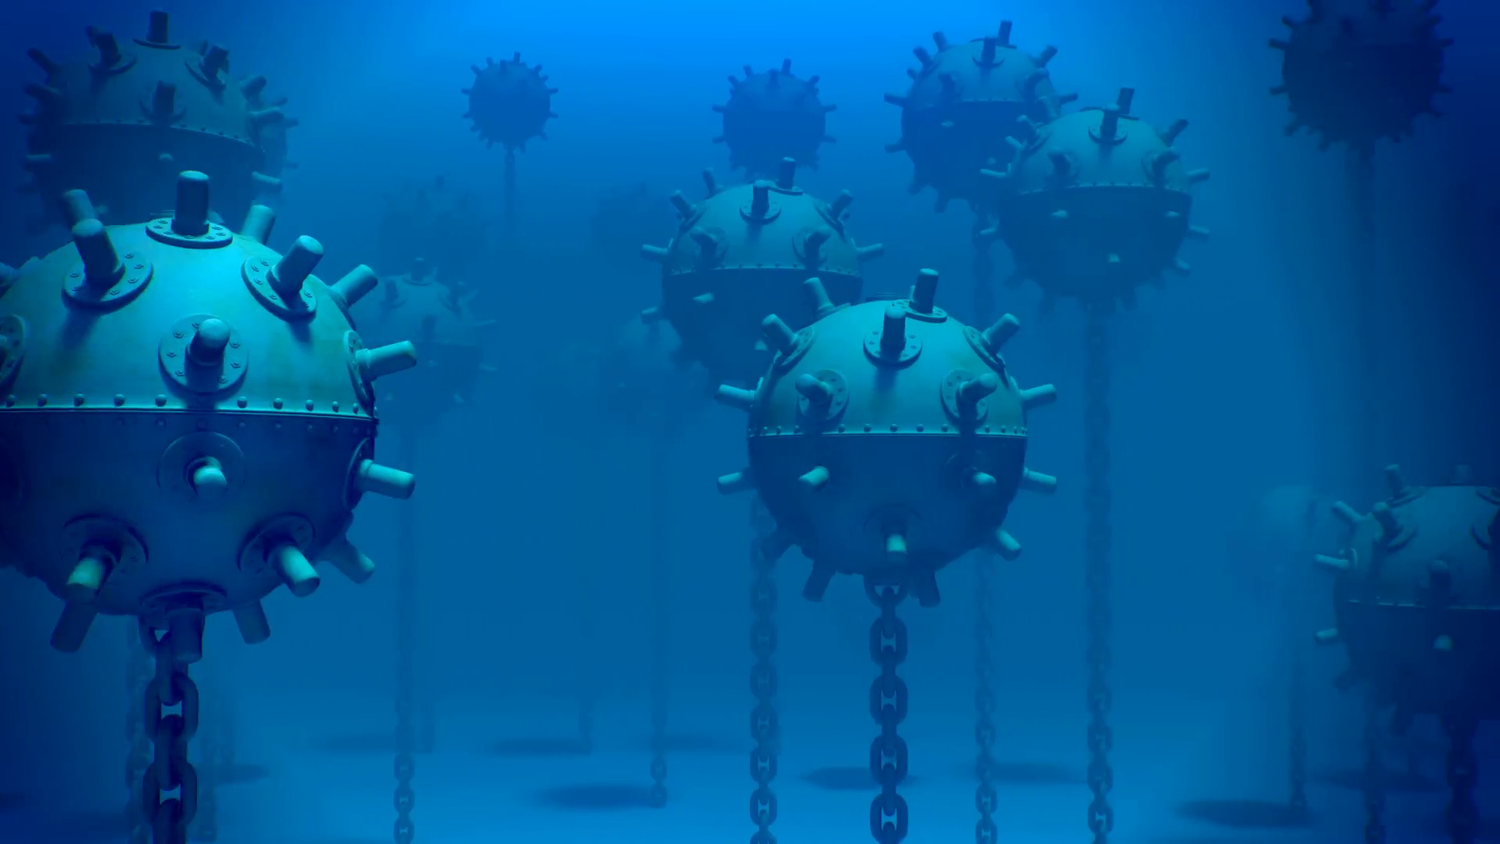
*Figure 1:*
<br>Image taken from: https://thestrategybridge.org/the-bridge/2018/8/8/sea-mines-in-amphibious-operations 


## Preliminary exploratory data analysis 

### Loading libraries

To process the data and preform classification, we will be using the `tidyverse`, `repr`, `tidymodels`, and `GGally` packages. 

We will also use `cowplot` to center plots beside one another. 

In [1]:
library(tidyverse)
library(repr)
library(cowplot)
library(GGally)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.

### Reading the data

We will read the data directly from the UCI Machine Learning Repository (link https://archive.ics.uci.edu/ml/index.php). 

The last 10 rows will be outputted as a preview showing the current state of the data collected.

It is worthwhile to note that there are 60 columns, each denoting the energy within a frequency band over a period of time. And, each value is a number between 0 and 1 (representing energy in a frequency band). 

In [2]:
sonar_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE)

tail(sonar_data, 10) # only last 10 rows will be outputted as a preview (dataset is very large if we preview more)

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



X1     X2     X3     X4     X5     X6     X7     X8     X9     X10    ⋯
1  0.0238 0.0318 0.0422 0.0399 0.0788 0.0766 0.0881 0.1143 0.1594 0.2048 ⋯
2  0.0116 0.0744 0.0367 0.0225 0.0076 0.0545 0.1110 0.1069 0.1708 0.2271 ⋯
3  0.0131 0.0387 0.0329 0.0078 0.0721 0.1341 0.1626 0.1902 0.2610 0.3193 ⋯
4  0.0335 0.0258 0.0398 0.0570 0.0529 0.1091 0.1709 0.1684 0.1865 0.2660 ⋯
5  0.0272 0.0378 0.0488 0.0848 0.1127 0.1103 0.1349 0.2337 0.3113 0.3997 ⋯
6  0.0187 0.0346 0.0168 0.0177 0.0393 0.1630 0.2028 0.1694 0.2328 0.2684 ⋯
7  0.0323 0.0101 0.0298 0.0564 0.0760 0.0958 0.0990 0.1018 0.1030 0.2154 ⋯
8  0.0522 0.0437 0.0180 0.0292 0.0351 0.1171 0.1257 0.1178 0.1258 0.2529 ⋯
9  0.0303 0.0353 0.0490 0.0608 0.0167 0.1354 0.1465 0.1123 0.1945 0.2354 ⋯
10 0.0260 0.0363 0.0136 0.0272 0.0214 0.0338 0.0655 0.1400 0.1843 0.2354 ⋯
   X52    X53    X54    X55    X56    X57    X58    X59    X60    X61
1  0.0096 0.0071 0.0084 0.0038 0.0026 0.0028 0.0013 0.0035 0.0060 M  
2  0.0141 0.0103 0.0100 0.0034 0.0026 0.0037 0.0044 0.0057 0.0035 M  
3  0.0150 0.0076 0.0032 0.0037 0.0071 0.0040 0.0009 0.0015 0.0085 M  
4  0.0120 0.0039 0.0053 0.0062 0.0046 0.0045 0.0022 0.0005 0.0031 M  
5  0.0091 0.0045 0.0043 0.0043 0.0098 0.0054 0.0051 0.0065 0.0103 M  
6  0.0116 0.0098 0.0199 0.0033 0.0101 0.0065 0.0115 0.0193 0.0157 M  
7  0.0061 0.0093 0.0135 0.0063 0.0063 0.0034 0.0032 0.0062 0.0067 M  
8  0.0160 0.0029 0.0051 0.0062 0.0089 0.0140 0.0138 0.0077 0.0031 M  
9  0.0086 0.0046 0.0126 0.0036 0.0035 0.0034 0.0079 0.0036 0.0048 M  
10 0.0146 0.0129 0.0047 0.0039 0.0061 0.0040 0.0036 0.0061 0.0115 M

*Table 1*

### Tidying the data

We also preprocess the data to move the column that we are classifying by (categories) to the first column rather than the end to make it more clear which each row represents.

In [3]:
set.seed(2000)
numeric_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    select(-X61)

categories <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    pull(X61)

sonar_data <- tibble(categories, numeric_data) %>%
    mutate(categories = as_factor(categories))

head(sonar_data, 10) # preview the first 10 rows

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



categories X1     X2     X3     X4     X5     X6     X7     X8     X9     ⋯
1  R          0.0200 0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 ⋯
2  R          0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 ⋯
3  R          0.0262 0.0582 0.1099 0.1083 0.0974 0.2280 0.2431 0.3771 0.5598 ⋯
4  R          0.0100 0.0171 0.0623 0.0205 0.0205 0.0368 0.1098 0.1276 0.0598 ⋯
5  R          0.0762 0.0666 0.0481 0.0394 0.0590 0.0649 0.1209 0.2467 0.3564 ⋯
6  R          0.0286 0.0453 0.0277 0.0174 0.0384 0.0990 0.1201 0.1833 0.2105 ⋯
7  R          0.0317 0.0956 0.1321 0.1408 0.1674 0.1710 0.0731 0.1401 0.2083 ⋯
8  R          0.0519 0.0548 0.0842 0.0319 0.1158 0.0922 0.1027 0.0613 0.1465 ⋯
9  R          0.0223 0.0375 0.0484 0.0475 0.0647 0.0591 0.0753 0.0098 0.0684 ⋯
10 R          0.0164 0.0173 0.0347 0.0070 0.0187 0.0671 0.1056 0.0697 0.0962 ⋯
   X51    X52    X53    X54    X55    X56    X57    X58    X59    X60   
1  0.0232 0.0027 0.0065 0.0159 0.0072 0.0167 0.0180 0.0084 0.0090 0.0032
2  0.0125 0.0084 0.0089 0.0048 0.0094 0.0191 0.0140 0.0049 0.0052 0.0044
3  0.0033 0.0232 0.0166 0.0095 0.0180 0.0244 0.0316 0.0164 0.0095 0.0078
4  0.0241 0.0121 0.0036 0.0150 0.0085 0.0073 0.0050 0.0044 0.0040 0.0117
5  0.0156 0.0031 0.0054 0.0105 0.0110 0.0015 0.0072 0.0048 0.0107 0.0094
6  0.0104 0.0045 0.0014 0.0038 0.0013 0.0089 0.0057 0.0027 0.0051 0.0062
7  0.0195 0.0201 0.0248 0.0131 0.0070 0.0138 0.0092 0.0143 0.0036 0.0103
8  0.0052 0.0081 0.0120 0.0045 0.0121 0.0097 0.0085 0.0047 0.0048 0.0053
9  0.0061 0.0145 0.0128 0.0145 0.0058 0.0049 0.0065 0.0093 0.0059 0.0022
10 0.0118 0.0090 0.0223 0.0179 0.0084 0.0068 0.0032 0.0035 0.0056 0.0040

*Table 2*

### Splitting into training and testing data

Split 75% of the data to be training data and the remaining 25% as testing data. 

In [4]:
sonar_split <- initial_split(sonar_data, prop = 0.75, strata = categories)  
training_data <- training(sonar_split)   
testing_data <- testing(sonar_split)

tail(training_data, 3) # training data preview with the last three rows

categories X1     X2     X3     X4     X5     X6     X7     X8     X9     ⋯
1 M          0.0522 0.0437 0.0180 0.0292 0.0351 0.1171 0.1257 0.1178 0.1258 ⋯
2 M          0.0303 0.0353 0.0490 0.0608 0.0167 0.1354 0.1465 0.1123 0.1945 ⋯
3 M          0.0260 0.0363 0.0136 0.0272 0.0214 0.0338 0.0655 0.1400 0.1843 ⋯
  X51    X52    X53    X54    X55    X56    X57    X58    X59    X60   
1 0.0155 0.0160 0.0029 0.0051 0.0062 0.0089 0.0140 0.0138 0.0077 0.0031
2 0.0042 0.0086 0.0046 0.0126 0.0036 0.0035 0.0034 0.0079 0.0036 0.0048
3 0.0181 0.0146 0.0129 0.0047 0.0039 0.0061 0.0040 0.0036 0.0061 0.0115

*Table 3*

### Experimenting with preprocessing
In our proposal, we found the mean of each energy value from each frequency band in the training data as an indicator to classify by.

Additionally, we figured that to distill the classification into two variables that can be plotted, we can find the mean from the first range of sonar data (from X1-X30) labeled as mean1 and the range from (X31-X60), labeled mean2. This can give us two variables that can be compared against each other (and factors in each column) when creating the classification algorithm.

However, since the proposal, we have removed the mean of X1-X30 and X31-X60. The reason is that during our experimentation and testing of training the model, it yielded lower results and was not an accurate predictor. The mean considers the sum of data, which provides us with a general summary of the data. However, if we use mean as the predictor, it may not give us a good prediction at some points, thus leading to low accuracy. For example, some frequencies have an energy of about 0.0023, but some frequencies have an energy of about 0.93. If we calculate the average value, it will give us the middle value of these data without considering the data points on the extreme end of the spectrum. Therefore, in this case, considering the low accuracy we got when using the average, it meant that it is not a very good predictor.

### Summarizing the data

By giving a summary of the data, we hope to give the reader an understanding of the dataset we are using by reporting a snapshot of information like the number of observations we are training with. 

As shown, we have 73 observations of sonar data for rocks and 84 observations of measurements for mines for training. 

In [5]:
summary <- training_data %>% 
    group_by(categories) %>% 
    summarize(n = n())

summary

`summarise()` ungrouping output (override with `.groups` argument)



categories n 
1 R          73
2 M          84

*Table 4*

It is noteworthy that in table 4, we see that there is a higher number of data points that are mines. This raises the concern that this could be a class imbalance. Class imbalance occurs when one label is more common than another, and since K-nearest neighbours uses the labels from nearby points to predict the label of a new point, the algorithm will be more likely pick that label (i.e. there is a higher probabiltity if getting points that fall under the higher category). 

While we would like to acknowledge the issues of class imbalance, we did not change the way the model was created because there is only roughly a 15 percent difference between the number of rocks and the number of mines. This difference is negligible as it did not seem to alter the preformance of the model significantly.

### Plot

The Connectionist Bench (Sonar, Mines vs. Rocks) Data Set from the University of California Irvine contains 60 columns each representing the energy levels from a frequency band. With these 60 different variables, we need a way to choose the best predictor variables for the model. To do this, we can measure correlation with a comparison graph. 

**A quick aside:**

It is also worth noting that due to the limitations of ggpairs, we cannot show correlation graphs for pairs like X1 and X60 because we can only pair a 10 x 10 matrix at a time while still making the graphs a size that is legible. While we would have liked to see if perhaps these different and more random combinations have distinct groupings of points this is a limitation we are unable to get around. 

The code is included for 6 different ggpair plots of 10 x 10 correlations matching going from 1-10, 11-20, etc, for which comments can be removed below if a reader wishes to view them and see that there is a lack of distinction within the predictors that we were able to compare. However, we will only be choosing to display one graph with random predictors selected to not add too many graphs and sacrifice the conciseness and ideas of the paper, while increasing the runtime of the project. 

In [6]:
comparison_plot_first_10 <- sonar_data  %>%
    select(X1:X10) %>%
    ggpairs(aes(color = categories))

comparison_plot_second_10 <- sonar_data  %>%
    select(X11:X20) %>%
    ggpairs(aes(color = categories))

comparison_plot_third_10 <- sonar_data  %>%
    select(X21:X30) %>%
    ggpairs(aes(color = categories))

comparison_plot_fourth_10 <- sonar_data  %>%
    select(X31:X40) %>%
    ggpairs(aes(color = categories))

comparison_plot_fifth_10 <- sonar_data  %>%
    select(X41:X50) %>%
    ggpairs(aes(color = categories))

comparison_plot_sixth_10 <- sonar_data  %>%
    select(X51:X60) %>%
    ggpairs(aes(color = categories))

# Uncomment to display the six graphs where the predictor values with the highest correlation came from:
# comparison_plot_first_10
# comparison_plot_second_10
# comparison_plot_third_10
# comparison_plot_fourth_10
# comparison_plot_fifth_10
# comparison_plot_sixth_10

By looking at the above graphs that were produced, we selected 10 variables at random (X9, X10, X17, X18, X36, X37, X26, X27, X48 and X49). We create a single graph with the random variables.

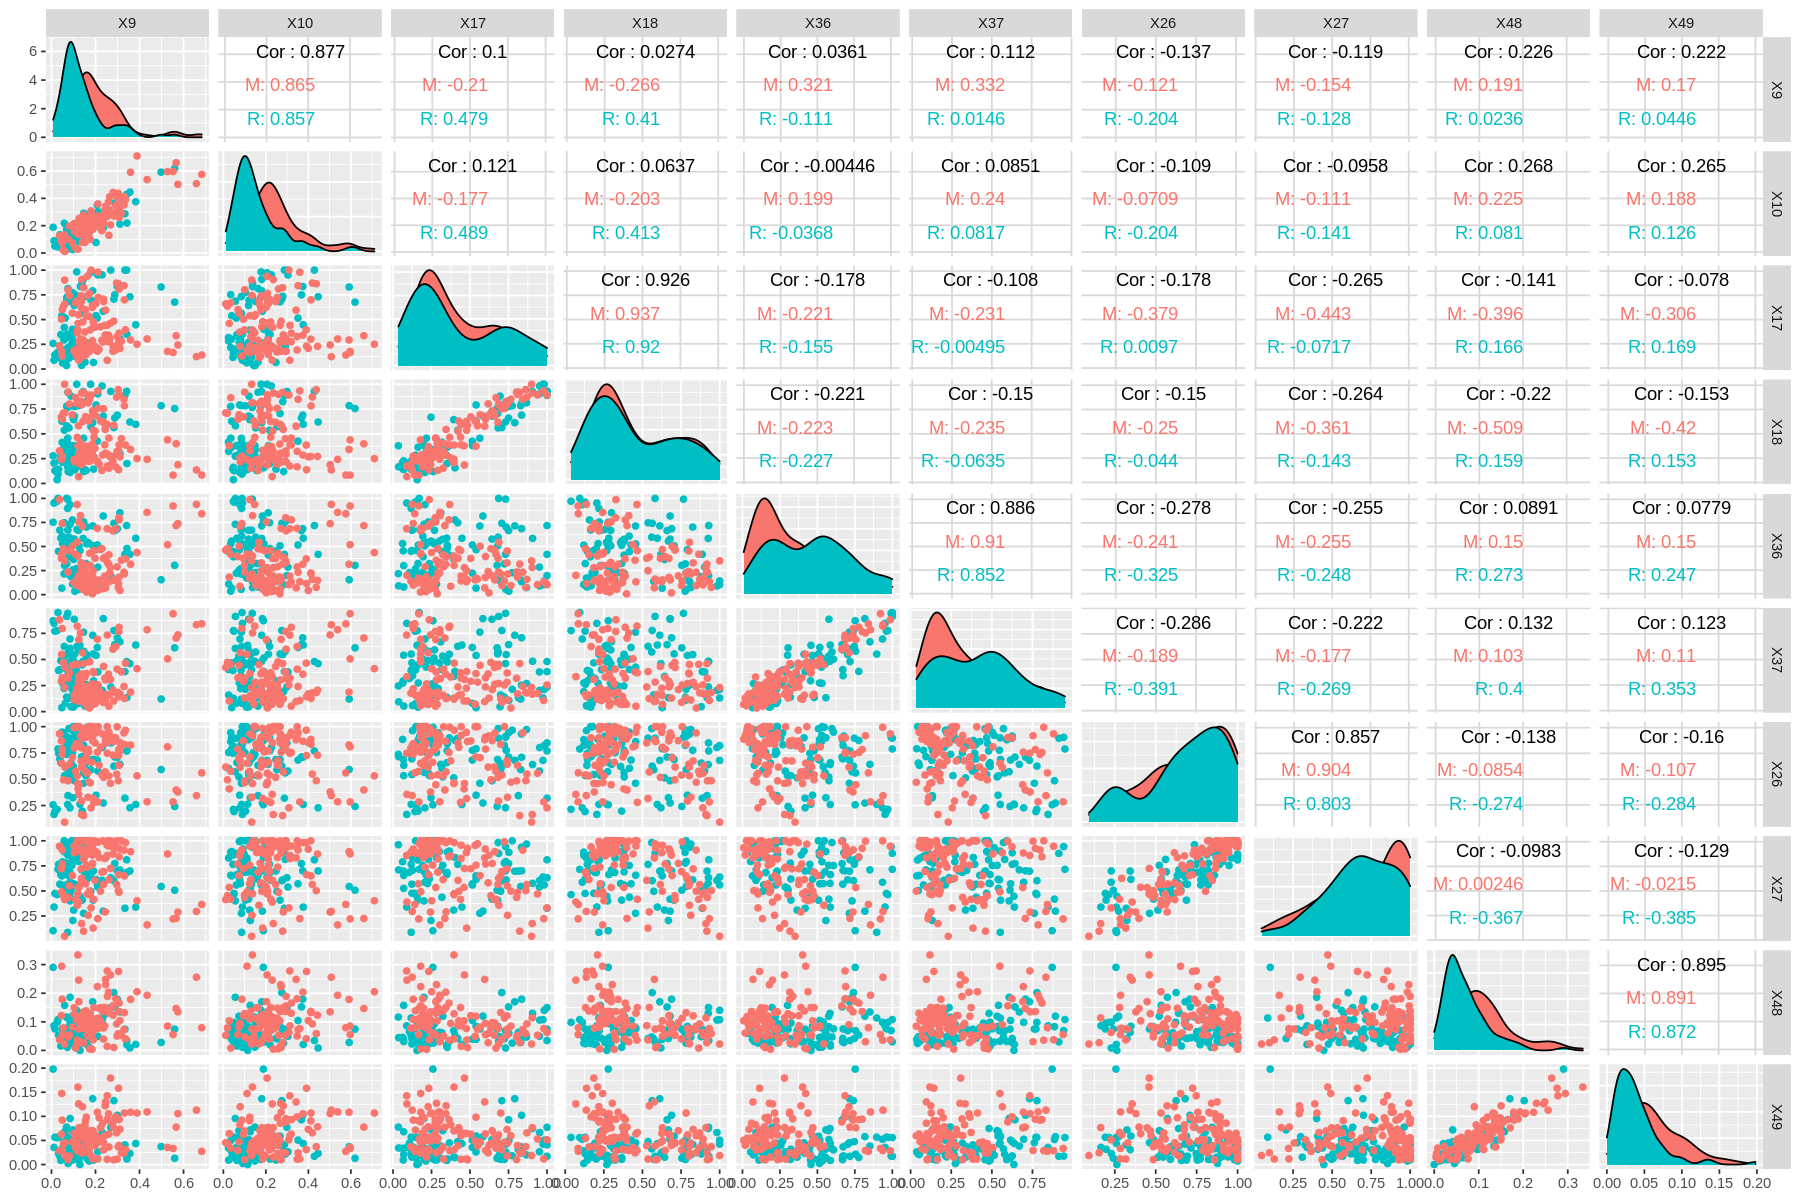

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)
highest_cor_plot <- sonar_data %>%
    select(X9, X10, X17, X18, X36, X37, X26, X27, X48, X49) %>%
    ggpairs(aes(color = categories))
highest_cor_plot

*Figure 2*

From the figure 2, we note that there are no distinct clusters from the points that can serve as helpful predictor variables. The same can be said about all predictor variables as we did not notice any predictor variables that had a high separation and visible clusters in the graphs. As a result, we decided to use all the predictors and trust the standards of data collection that the data scientists used when collecting the data. 

A potential hypothesis for the reason why none of the data points had a clear group (which would have been useful for KNN classification) is because of the varying angles of sonar instrument, each observation may have resulted in different energy levels for each frequency leading to no clear differing groups.

We can take a look at more in depth plots to see the lack of clusters and why KNN won't work well with only a specific few variables: 

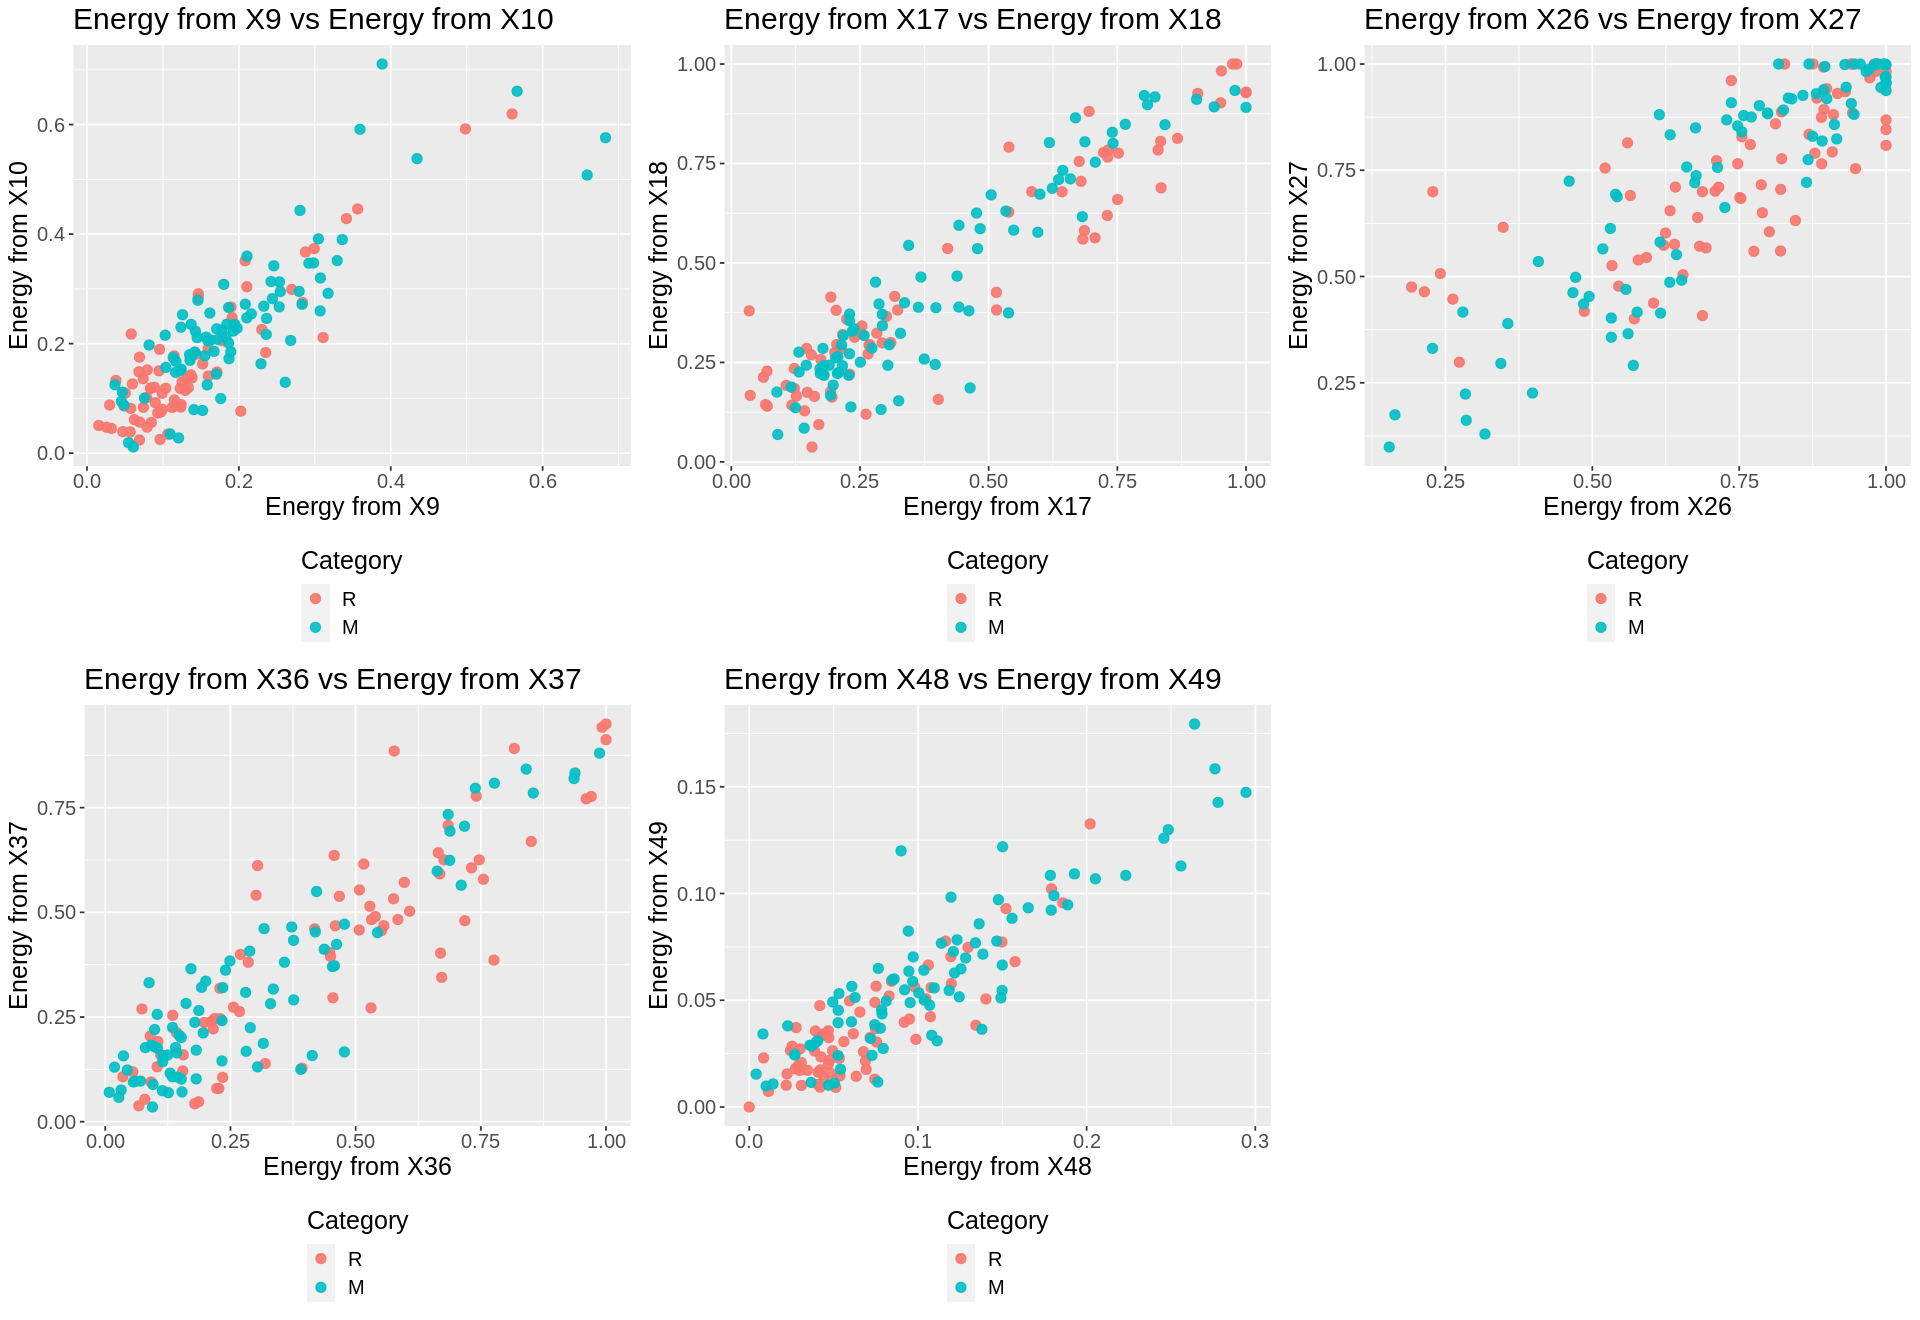

In [8]:
options(repr.plot.width = 16, repr.plot.height = 11)

best_correlation_plot1 <- ggplot(training_data, aes(x = X9, y = X10, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X9",
             y = "Energy from X10",
            colour = "Category") +
        ggtitle("Energy from X9 vs Energy from X10") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot2 <- ggplot(training_data, aes(x = X17, y = X18, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X17",
             y = "Energy from X18",
            colour = "Category") +
        ggtitle("Energy from X17 vs Energy from X18") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot3 <- ggplot(training_data, aes(x = X26, y = X27, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X26",
             y = "Energy from X27",
            colour = "Category") +
        ggtitle("Energy from X26 vs Energy from X27") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot4 <- ggplot(training_data, aes(x = X36, y = X37, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X36",
             y = "Energy from X37",
            colour = "Category") +
        ggtitle("Energy from X36 vs Energy from X37") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot5 <- ggplot(training_data, aes(x = X48, y = X49, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X48",
             y = "Energy from X49",
            colour = "Category") +
        ggtitle("Energy from X48 vs Energy from X49") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")
best_correlation_plot <- plot_grid(best_correlation_plot1, best_correlation_plot2, best_correlation_plot3, best_correlation_plot4
         , best_correlation_plot5)
best_correlation_plot

*Figure 3*

As seen in figure 3, in these graphs with a high correlation the points are combined and overlapping and no clear groups can be observed, as a result, there are no clear predictors that can be selected.

# Methods & Results
To conduct our analysis, we plan to both look at all 60 predictor values to train the KNN classification. As mentioned previously, there are no clear predictors that are distinctly separated into different clusters that can be used, and so instead it is a safer idea to pick all the energy levels from the dataset collected, as those are all presumably deemed important for them to have been included in the dataset.

We plan to use K-Nearest Neighbours to perform the classification and tuning to find the optimal number of neighbors that will lead us to the best classification accuracy. The model can then be rewritten with the best neighbor and it can be tested on the `testing_data` to measure accuracy.

This model will allow us to predict whether an underwater object is a rock or a mine.



## Data Analysis

To preform our data analysis we are going to use K-Nearest Neighbours. However, to find the optimal number of neighbours we will tune the classifier beforehand and graph the resultant accuracies in order to determine which value of $K$ (denoting neighbours) has the highest accuracy. That value of $K$ would be used for the actual model. We will use a vfold value of 10, meaning we are spliting our training data into 10 folds. Then, iteratively use 1 of them as the validation set and combine the remaining as the training set.

Note that we also will be fitting based on the resamples. This will run the cross-validation on each train/validation split. 

### Creating the Recipe, Vfold, and Workflow

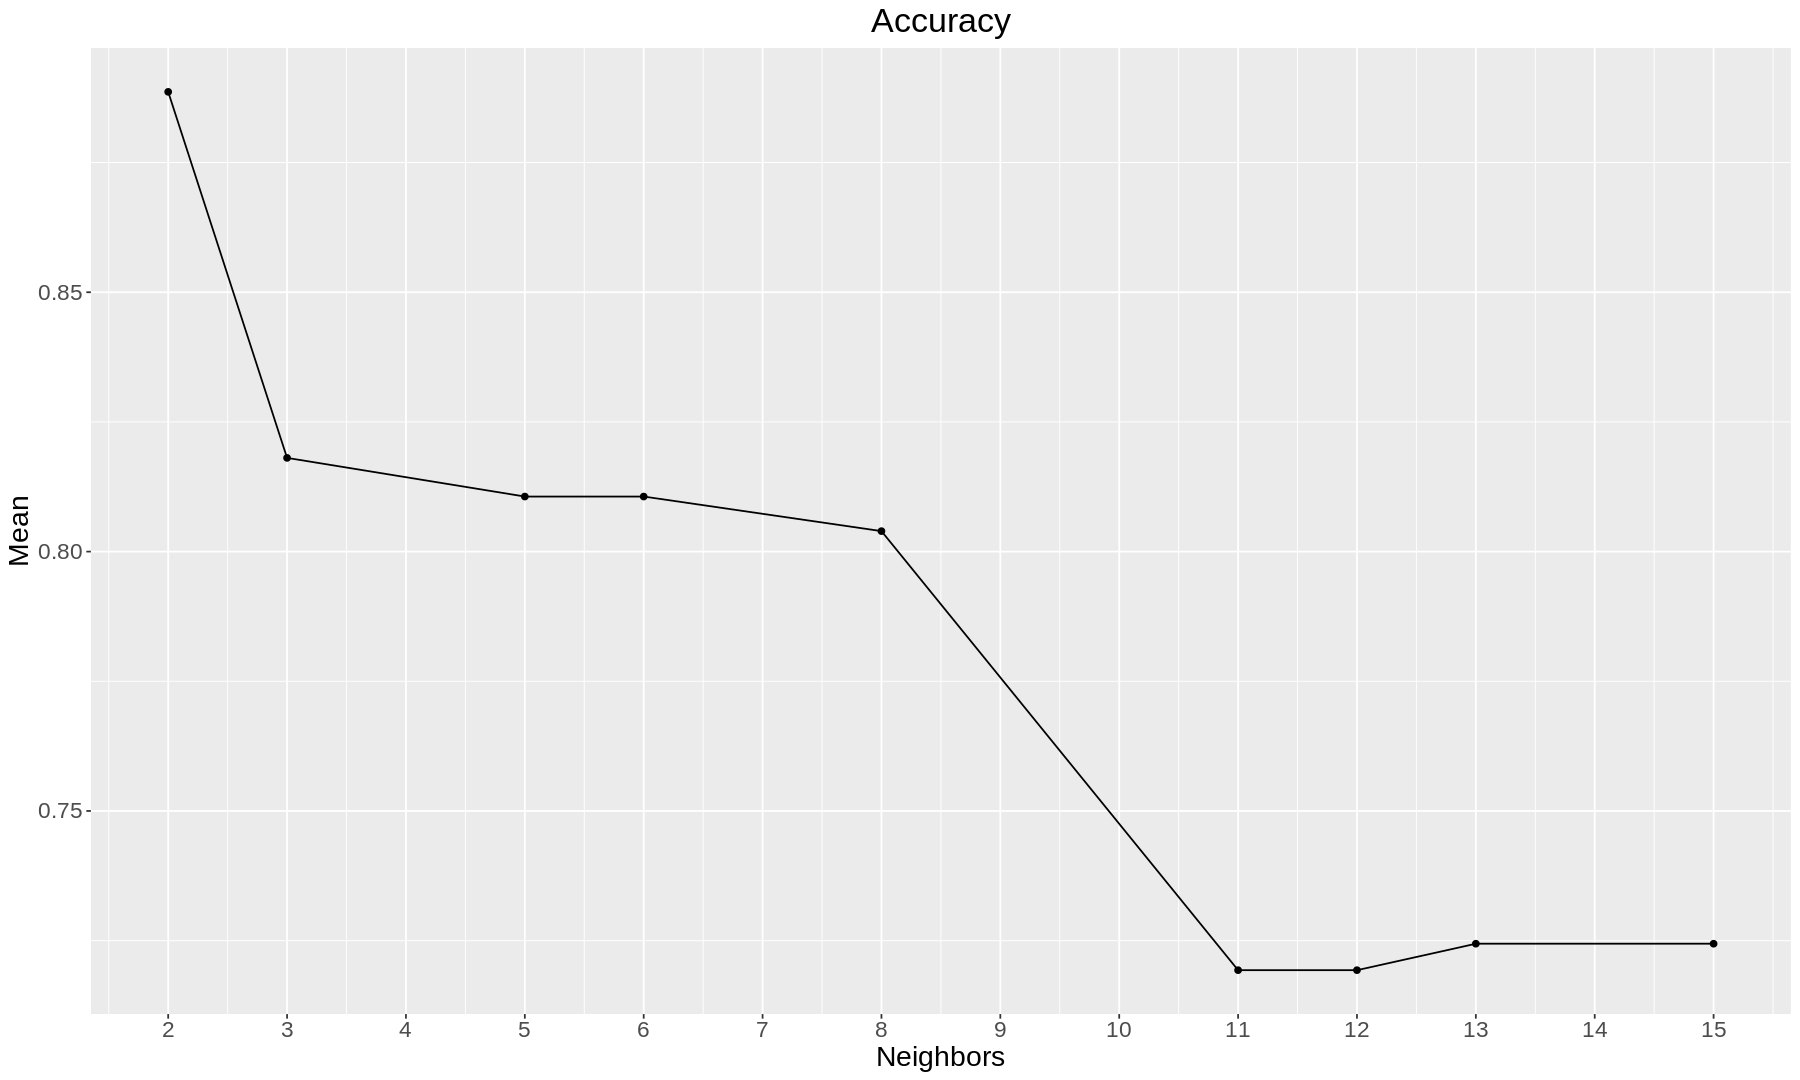

In [9]:
sonar_recipe <- recipe(categories ~ ., 
                       data = training_data) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

sonar_vfold <- vfold_cv(training_data, v = 10, strata = categories)

sonar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

sonar_fit <- workflow() %>%
      add_recipe(sonar_recipe) %>%
      add_model(sonar_spec) %>%
      tune_grid(resamples = sonar_vfold, grid = 10) %>%
      collect_metrics()

sonar_filtered_accuracy <- sonar_fit %>% 
    filter(.metric == "accuracy")

options(repr.plot.width = 15, repr.plot.height = 9)

tuning_plot <- sonar_filtered_accuracy %>% 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() + 
    scale_x_continuous(breaks = 0:20) +
    labs(x = "Neighbors", y = "Mean") + 
    ggtitle("Accuracy") +
    theme(text = element_text(size = 17),
         plot.title = element_text(hjust = 0.5))

tuning_plot

*Figure 4*

As shown in figure 4, a k value of 1 and then 2 yielded the highest mean. However, we picked 3 as our k value to train the final model on. This is because we picked the highest k-value not including 1 (to avoid overfitting; discussed in more detail in the next paragraph) and we avoided picking an even number like 2 because our model has only 2 classification categories (mine and rock). If we use 2 as our k value, if one nearby point is classified as a rock and the other as a mine, this will create a tie. Choosing a k-value of 3 will avoid ties and ensure that a prediction will be based on the categories from the majority of the surrounding 3 points. 

Despite a k value of 1 being reported as the predictor with the highest score it is a bad idea to use k = 1. This is because the classifier will essentially match each new observation to its closest neighbour. This means the model will be overfitted; the classifier becomes unreliable when seeing new data and the model it is influenced too heavily by the training data. 

### Rewriting the model with our most optimal value for K (K = 3)

In [10]:
sonar_spec_untuned <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>% 
    set_engine("kknn") %>%
    set_mode("classification")

sonar_fit_untuned <- workflow() %>%
      add_recipe(sonar_recipe) %>%
      add_model(sonar_spec_untuned) %>%
      fit(data = training_data)

sonar_predictions <- predict(sonar_fit_untuned, testing_data) %>% 
  bind_cols(testing_data)

sonar_metrics <- sonar_predictions %>%
      metrics(truth = categories, estimate = .pred_class) 

sonar_conf_mat <- sonar_predictions %>% 
      conf_mat(truth = categories, estimate = .pred_class)

#sonar_predictions
sonar_metrics
sonar_conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.7843137
2 kap      binary     0.5661253

          Truth
Prediction  R  M
         R 18  5
         M  6 22

*Table 5: The confusion matrix and accuracy of the model*

# Conclusion
After analyzing the data and creating a model we used a ggpairs plot to view the correlation between predictors to which we came to the conclusion that there were no obvious predictors that would seem to increase the accuracy of the K-NN classification model as no visible distinct groups were seen. Consequently, we used all 60 predictors in our model and obtained an accuracy of 78% after testing it on the testing split. The model predicted 18 rocks and 22 mines correctly while mispredicting 5 mines for rocks and 6 rocks for mines. 

### Expected Outcomes 

Our original goal for the project was to create an accurate K-NN classifier that can be used by scientists, fishing companies, governments, and whoever else may benefit from this type of information. While we have achieved a certain degree of accuracy there is room for further improvement than can be explored in the future. 

### Significance 


Naval mines were a common weapon used during World War II, yet have a long history prior, designed to sink ships, submarines, and other watercrafts or to prevent them from entering certain areas of the ocean. Some mines are activated by pressure points, while others can be triggered to explode by magnetic and electrical sensors set off by vessels approaching (Lagrone, 2014). Mines were used in abundance during various wars as they were inexpensive to manufacture, yet have the explosive ability to sink or greatly damage watercrafts of all sizes. 


<img src="https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/BS4YEPRDYJHAPB7GD4CZQWNPFQ.jpg" alt="Image of the Baltic Sea" width="600"/>

*Figure 5*

Image taken from: https://www.washingtonpost.com/world/2018/10/26/estonia-mines/ 


Figure 5 is a map of mines in the Balitc Sea, not a representation of the data in the model produced, that have been detected using SONAR mechanisms. The model created in this project provides the ability to classify objects with certain SONAR signatures as mines or rocks, as shown by the map in figure 5, the impact this model can have is quite significant for the safety of water navigation. According to the Estonian Naval Intelligence, they’ve identified over 80,000 mines in the Balitic Sea using SONAR data (Noack, 2018). The mines identified in the Baltic Sea have the capability to “sink [a] cruise ship” (Noack, 2018); to prevent such casualties, there are currently large efforts occurring in the Baltic Sea to safely control the explosion of these mines. Before classification models were created, there were several incidents of civilian casualties like when “three dutch fishermen were killed in 2005 after they accidentally reeled in a World War II American bomb” (Noack, 2018). Using a model like the one created in this project will help aid in the efforts of safely disposing of explosive devices littered throughout the world’s oceans. 

In addition to the immeasurable safety advantages that come from classifying objects as mines or rocks, the model also allows for fewer sound wave emissions per potential target. Reducing the amount of sound waves limits costs, time to identify objects, and reduces environmental harm to marine life. Marine life, particularly species that rely on echolocation for hunting and communication, are at high risk of injury or even death when SONAR is used: “[SONAR] testing would kill … 170,000 marine mammals and cause permanent injury to more than 500 whales, not to mention temporary deafness for at least 8,000 others (Scientific American, 2009)”. 

Without the use of a model to classify SONAR data, the only form of identification of underwater objects was through human ocean exploration (either through above water visualization or dives). Human exploration not only places divers at risk of setting off a mine, it is also not a time or cost efficient method of identification. When new SONAR frequency data points are collected, they can be run through the model to determine the location of a potential mine; the application of a model would entirely reduce the need for in-person explorations, allowing more resources to contribute to mine disposal. 


### Future Considerations 

While the ability to classify objects in the ocean as rocks or mines can offer many advancements in removal of active explosives, pollutants, and obstructions to ecosystems, there are many improvements and further investigations that can be added to the data and model which can lead to more accurate classifications. 

Geological material on the seafloor is quite diverse; this data could be further used to observe changes in classification depending on seafloor material - such as deposits of various minerals, volcanic rock, sand, clay, sedimentary rock, and many more. Considering SONAR’s mechanisms depend on the density of the object to classify its signal as rock or metallic cylinder - different materials on the seafloor could have an impact on misclassifications of objects. A future question to explore could be “what would the impact of different seafloor materials have on the classification of rocks and mines?”. 

Could changing the data used to train and test the model create more reliable classifications? In the training data, there were 73 rocks and 84 mines, if the data set used had more data available, would our model still have the same accuracy for classifications and provide us with a higher confidence in the results (due to the increased data points used to train and test)? 

Perhaps our model will not only be able to assist in cleaning our oceans, but perhaps it could lead to new questions like what other objects can be classified using sonar data? Could we broaden the model to classify new and different objects?

And, if sonar technology becomes less expensive in the future, accessibility to these models and technologies can lead to even more discoveries of unwanted materials.

### References 

Bell, J., Petillot, Y., Reed, S.(2003). An automatic approach to the detection and extraction of mine features in sidescan sonar. IEEE, 28(1), 90-105. 

Burton, L., & Lai, H.(1997) Active sonar target imaging and classification system.Detection and Remediation Technologies for Mines and Minelike Targets II. https://doi.org/10.1117/12.280875 

Gorman, R. P., & Sejnowski, T. J. (1988). Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets in Neural Networks, Vol. 1, pp. 75-89. https://doi.org/10.1016/0893-6080(88)90023-8

Ismail, B., & Mohamed, M. (2015). Semisupervised local fusion approach for mine detection in SONAR data International Journal of Intelligent systems.(20), 11, 1161-1183. https://doi.org/10.1002/int.21739Larry 

Lagrone, S.(2014). A Terrible Thing That Waits (Under the Ocean). Popular Science. https://www.popsci.com/blog-network/shipshape/terrible-thing-waits-under-ocean/. 

Noack, R. (2018). Estonia is still clearing thousands of World War II mines from its waters. The Washington Post. https://www.washingtonpost.com/world/2018/10/26/estonia-mines/. 

Pamaja, V., Rajendran, V., & Vijayalakshmi, P. (2020). Study on metal mine detection from underwater sonar images using data mining and machine learning techniques. Journal Of Ambient Intelligence And Humanized Computing.(12), 5, 5083-5092. https://doi.org/10.1007/s12652-020-01958-4

Scientific American.(2009) Does Military Sonar Kill Marine Wildlife? Scientific American. https://www.scientificamerican.com/article/does-military-sonar-kill/#:~:text=Unfortunately%20for%20many%20whales%2C%20dolphins,to%20injury%20and%20even%20death. 

Sejnowski, T.(1988).Connectionist Bench (Sonar, Mines vs. Rocks) Data Set. UCI Machine Learning Repository.  http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

Timbers, T., Campbell, T., & Lee, M.(2022). Data Science A First Introduction. CRC Press. https://datasciencebook.ca/

### Image References

Abbey, J. (2018, August 08). Sea Mines in Amphibious Operations. The Strategy Bridge. https://thestrategybridge.org/the-bridge/2018/8/8/sea-mines-in-amphibious-operations. 

Noack, R. (2018, October 26). Estonia is still clearing thousands of World War II mines from its waters. The Washington Post. https://www.washingtonpost.com/world/2018/10/26/estonia-mines/. 